In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

options = Options()
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36"
options.add_argument(f"user-agent={user_agent}")
options.add_argument("--headless")  # بدون باز شدن پنجره مرورگر

driver = webdriver.Chrome(options=options)

base_url = "https://divar.ir/s/tehran/rent-villa"
all_listings = []

for page in range(1, 10):  # گرفتن ۹ صفحه
    print(f"Fetching page {page}...")
    url = f"{base_url}?page={page}"
    driver.get(url)
    time.sleep(5)  # صبر برای لود کامل صفحه

    ads = driver.find_elements(By.CSS_SELECTOR, "article.unsafe-kt-post-card")
    if not ads:
        print("دیگه آگهی بیشتری وجود نداره")
        break

    for ad in ads:
        try:
            title = ad.find_element(By.CSS_SELECTOR, "h2.unsafe-kt-post-card__title").text
            price_elems = ad.find_elements(By.CSS_SELECTOR, "div.unsafe-kt-post-card__description")
            deposit = price_elems[0].text if len(price_elems) > 0 else ""
            rent = price_elems[1].text if len(price_elems) > 1 else ""
            location = ad.find_element(By.CSS_SELECTOR, "span.unsafe-kt-post-card__bottom-description").get_attribute("title")
            link = ad.find_element(By.CSS_SELECTOR, "a.unsafe-kt-post-card__action").get_attribute("href")
            if not link.startswith("http"):
                link = "https://divar.ir" + link

            listing = {
                "title": title,
                "location": location,
                "deposit": deposit,
                "rent": rent,
                "link": link
            }
            all_listings.append(listing)
        except Exception as e:
            print("خطا در خواندن یک آگهی:", e)

driver.quit()

# ذخیره در CSV
df = pd.DataFrame(all_listings)
df.to_csv("divar_listings.csv", index=False)
print(f"\nتعداد کل آگهی‌ها جمع‌آوری شده: {len(df)}")


Fetching page 1...
Fetching page 2...
Fetching page 3...
Fetching page 4...
Fetching page 5...
Fetching page 6...
Fetching page 7...
Fetching page 8...
Fetching page 9...

تعداد کل آگهی‌ها جمع‌آوری شده: 126


<div style = "direction : rtl ;">




✅ مراحل اصلی پروژه:


- Data Collection (جمع‌آوری داده): ✔️ تمام شد
- Data Cleaning & Preprocessing (پاکسازی و پیش‌پردازش داده)
- Exploratory Data Analysis (EDA) (تحلیل اولیه داده)
- Feature Engineering (مهندسی ویژگی)
- Modeling : استفاده از الگوریتم‌های ML برای پیش‌بینی قیمت یا طبقه‌بندی نوع خانه
- Deployment / Visualization : نمایش نتایج به صورت تعاملی یا تهیه گزارش
- Export Final Report : گزارش نهایی به صورت Markdown + HTML

</div>

In [2]:
df = pd.read_csv("divar_listings.csv")
df.head()

,title,location,deposit,rent,link
0,مشاور املاک سبلان. ( شهرک مرتضی گرد.) املاک سبلان,در دولتخواه,"ودیعه: ۵۰,۰۰۰,۰۰۰ تومان","اجاره: ۶,۰۰۰,۰۰۰ تومان",https://divar.ir/v/%D9%85%D8%B4%D8%A7%D9%88%D8...
1,شهرارا مجتمع نسترن ۱۱۰متر ۳خوابه,مشاور صابونچی در شهرآرا,"ودیعه: ۲,۰۰۰,۰۰۰,۰۰۰ تومان","اجاره: ۳,۰۰۰,۰۰۰ تومان",https://divar.ir/v/%D8%B4%D9%87%D8%B1%D8%A7%D8...
2,رهن خانه ویلایی ۴۰۰ متری ۵ خوابه در مرزداران,آژانس املاک مدرن2 در مرزداران,"ودیعه: ۷,۰۰۰,۰۰۰,۰۰۰ تومان",رهن کامل,https://divar.ir/v/%D8%B1%D9%87%D9%86-%D8%AE%D...
3,رهن خانه,۱ ساعت پیش در کوثر,"ودیعه: ۴۵,۰۰۰,۰۰۰ تومان","اجاره: ۱,۰۰۰,۰۰۰ تومان",https://divar.ir/v/%D8%B1%D9%87%D9%86-%D8%AE%D...
4,فوری واحد نقلی مجردی و خانواده,۱ ساعت پیش در دکتر هوشیار,"ودیعه: ۳۵۰,۰۰۰,۰۰۰ تومان",رهن کامل,https://divar.ir/v/%D9%81%D9%88%D8%B1%DB%8C-%D...


In [6]:
df = pd.read_csv("divar_listings.csv")

# تابع استخراج عدد
def extract_number(text):
    # جایگزینی اعداد فارسی با انگلیسی
    text = text.translate(str.maketrans("۰۱۲۳۴۵۶۷۸۹", "0123456789"))
    
    # حذف کاراکترهای غیرعددی به جز ارقام و اعشار
    cleaned_text = re.sub(r"[^0-9]", "", text)
    
    if cleaned_text:
        return int(cleaned_text)
    return 0  # اگر عددی پیدا نشد


# اضافه کردن ستون‌های عددی
df['deposit_num'] = df['deposit'].apply(extract_number)
df['rent_num'] = df['rent'].apply(extract_number)

# تبدیل به میلیون تومان (اختیاری)
df['deposit_million'] = df['deposit_num'] / 1e6
df['rent_million'] = df['rent_num'] / 1e6


# ✅ حالا فیلتر را اعمال کن
filtered_df = df[(df['deposit_num'] < 1_000_000_000) & (df['rent_num'] < 30_000_000)]

# نمایش نتایج
print(f"تعداد آگهی‌های باقی‌مانده: {len(filtered_df)}")
filtered_df[['title', 'location', 'deposit', 'rent', 'deposit_num', 'rent_num']].head()

تعداد آگهی‌های باقی‌مانده: 45


,title,location,deposit,rent,deposit_num,rent_num
0,مشاور املاک سبلان. ( شهرک مرتضی گرد.) املاک سبلان,در دولتخواه,"ودیعه: ۵۰,۰۰۰,۰۰۰ تومان","اجاره: ۶,۰۰۰,۰۰۰ تومان",50000000,6000000
3,رهن خانه,۱ ساعت پیش در کوثر,"ودیعه: ۴۵,۰۰۰,۰۰۰ تومان","اجاره: ۱,۰۰۰,۰۰۰ تومان",45000000,1000000
4,فوری واحد نقلی مجردی و خانواده,۱ ساعت پیش در دکتر هوشیار,"ودیعه: ۳۵۰,۰۰۰,۰۰۰ تومان",رهن کامل,350000000,0
5,خانه دوطبقه دربست تقی اباد شهرری,در ظهیرآباد,"ودیعه: ۶۰۰,۰۰۰,۰۰۰ تومان","اجاره: ۴,۰۰۰,۰۰۰ تومان",600000000,4000000
6,اجاره خانه ویلایی ۵۰ متری ۱ خوابه در خلیج فارس,۱ ساعت پیش در خلیج فارس,"ودیعه: ۲۰۰,۰۰۰,۰۰۰ تومان","اجاره: ۵,۵۰۰,۰۰۰ تومان",200000000,5500000


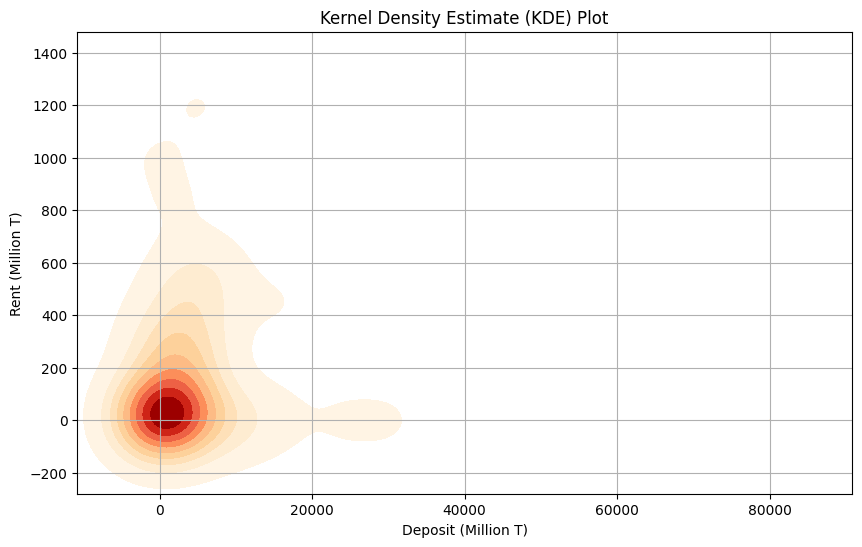

In [7]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='deposit_million', y='rent_million', fill=True, cmap='OrRd')
plt.title("Kernel Density Estimate (KDE) Plot")
plt.xlabel("Deposit (Million T)")
plt.ylabel("Rent (Million T)")
plt.grid(True)
plt.show()

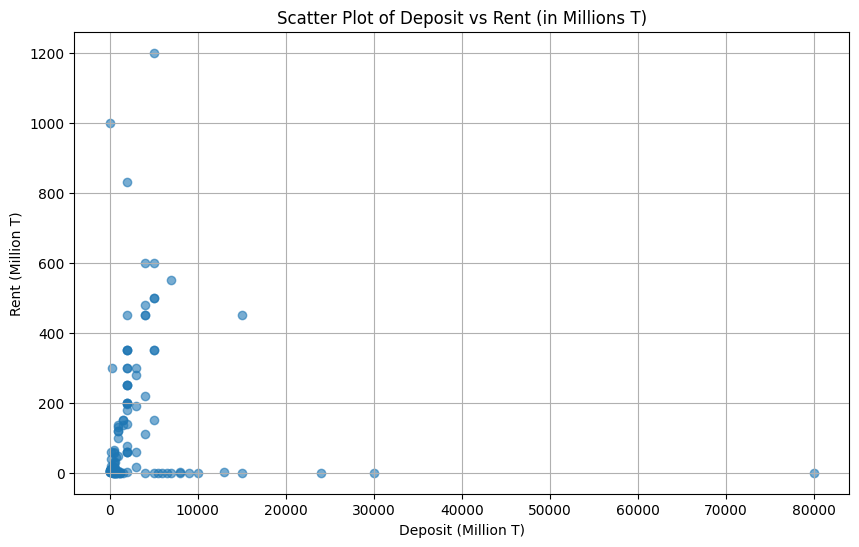

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df['deposit_million'], df['rent_million'], alpha=0.6)
plt.title("Scatter Plot of Deposit vs Rent (in Millions T)")
plt.xlabel("Deposit (Million T)")
plt.ylabel("Rent (Million T)")
plt.grid(True)
plt.show()

حالا میخوام تمرکز رو ببرم روی دیتاهای اصلی وو دیتاهای پرت فیلتر بشن

In [9]:
# فیلتر کردن: ودیعه کمتر از یک میلیارد و اجاره کمتر از ۳۰ میلیون
filtered_df = df[(df['deposit_num'] < 1_000_000_000) & (df['rent_num'] < 30_000_000)]

# نمایش تعداد و چند نمونه
print(f"تعداد آگهی‌های باقی‌مانده: {len(filtered_df)}")
filtered_df[['title', 'location', 'deposit_million', 'rent_million']]

تعداد آگهی‌های باقی‌مانده: 45


,title,location,deposit_million,rent_million
0,مشاور املاک سبلان. ( شهرک مرتضی گرد.) املاک سبلان,در دولتخواه,50.0,6.0
3,رهن خانه,۱ ساعت پیش در کوثر,45.0,1.0
4,فوری واحد نقلی مجردی و خانواده,۱ ساعت پیش در دکتر هوشیار,350.0,0.0
5,خانه دوطبقه دربست تقی اباد شهرری,در ظهیرآباد,600.0,4.0
6,اجاره خانه ویلایی ۵۰ متری ۱ خوابه در خلیج فارس,۱ ساعت پیش در خلیج فارس,200.0,5.5
8,اجاره خانه ویلایی ۵۰ متری ۱ خوابه در تهران‌سر,۱ ساعت پیش در تهران‌سر,200.0,4.0
15,خانه ویلایی,۲ ساعت پیش در طیب,750.0,0.1
16,اجاره خانه ویلایی ۴۰ متری ۲ خوابه در مولوی,۲ ساعت پیش در مولوی,100.0,8.0
17,خانه دربستی ۶۰ متر,۲ ساعت پیش در مینابی,250.0,4.5
19,اجاره خانه ویلایی ۶۰ متری ۱ خوابه در شهادت,۲ ساعت پیش در شهادت,300.0,8.0


In [10]:
filtered_df.to_csv("divar_filtered_by_deposit_rent.csv", index=False)
print("لیست فیلتر شده ذخیره شد!")

لیست فیلتر شده ذخیره شد!


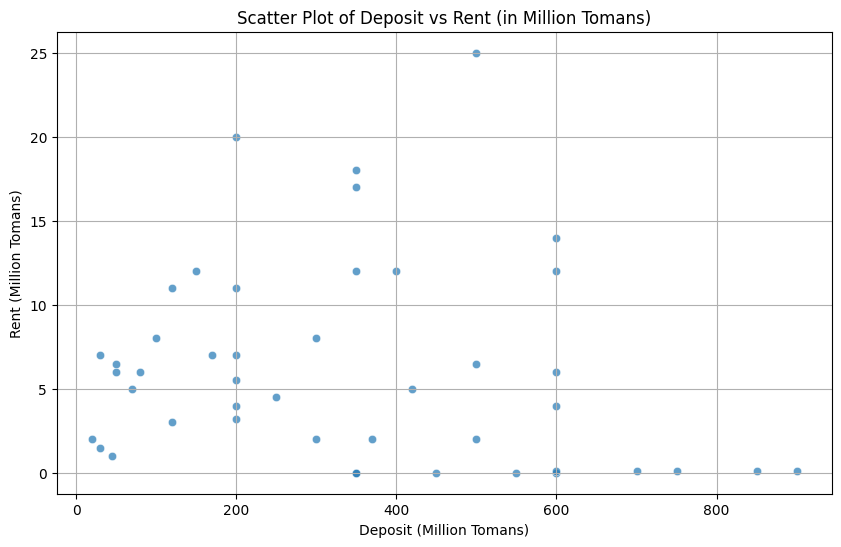

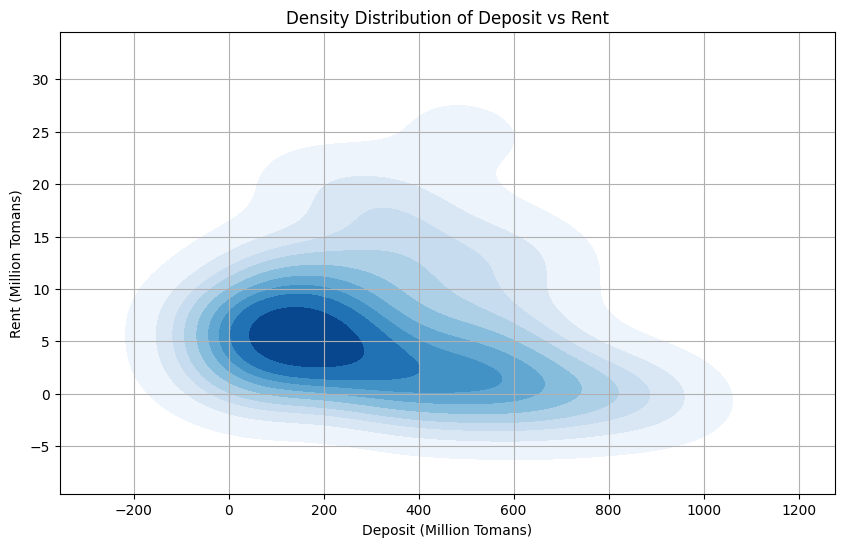

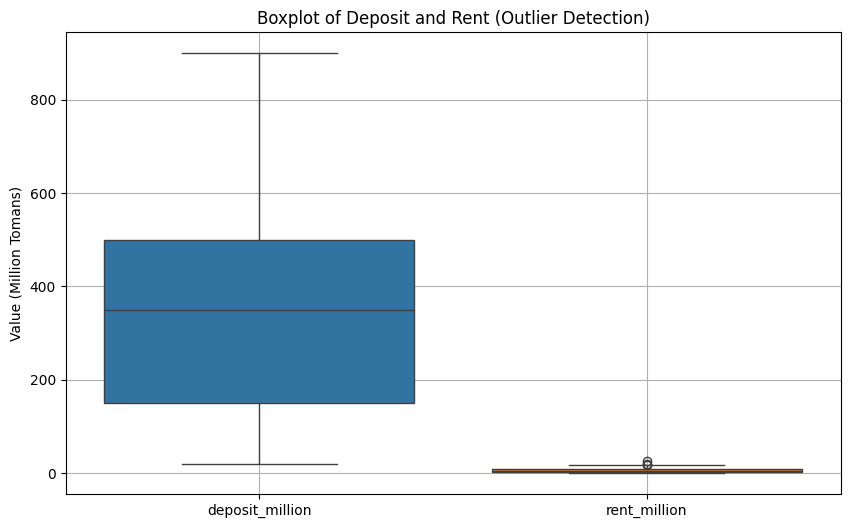

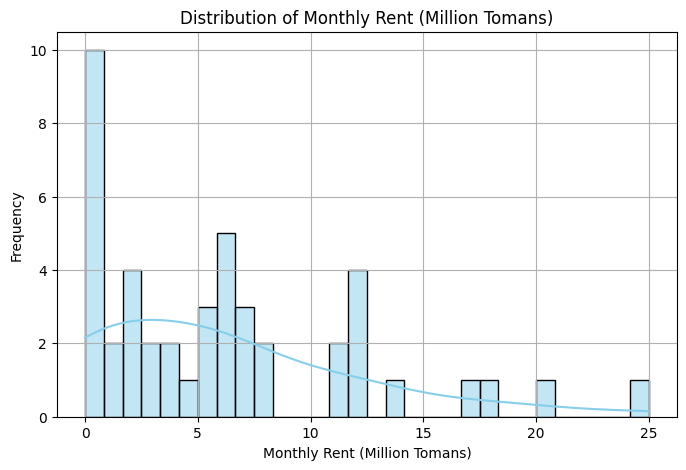

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Scatter Plot ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='deposit_million', y='rent_million', alpha=0.7)
plt.title("Scatter Plot of Deposit vs Rent (in Million Tomans)")
plt.xlabel("Deposit (Million Tomans)")
plt.ylabel("Rent (Million Tomans)")
plt.grid(True)
plt.show()

# --- 2. KDE Plot ---
plt.figure(figsize=(10, 6))
sns.kdeplot(data=filtered_df, x='deposit_million', y='rent_million', fill=True, cmap="Blues")
plt.title("Density Distribution of Deposit vs Rent")
plt.xlabel("Deposit (Million Tomans)")
plt.ylabel("Rent (Million Tomans)")
plt.grid(True)
plt.show()

# --- 3. Boxplot for Outlier Detection ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df[['deposit_million', 'rent_million']])
plt.title("Boxplot of Deposit and Rent (Outlier Detection)")
plt.ylabel("Value (Million Tomans)")
plt.grid(True)
plt.show()

# --- 4. Histogram of Rent Distribution ---
plt.figure(figsize=(8, 5))
sns.histplot(filtered_df['rent_million'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Monthly Rent (Million Tomans)")
plt.xlabel("Monthly Rent (Million Tomans)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [12]:
# ضریب همبستگی بین ودیعه و اجاره
correlation = filtered_df['deposit_num'].corr(filtered_df['rent_num'])
print(f"ضریب همبستگی بین ودیعه و اجاره: {correlation:.2f}")

# آمار توصیفی
print("\nآمار توصیفی:")
print(filtered_df[['deposit_million', 'rent_million']].describe())

ضریب همبستگی بین ودیعه و اجاره: -0.16

آمار توصیفی:
       deposit_million  rent_million
count        45.000000     45.000000
mean        340.555556      6.160000
std         236.451567      5.998083
min          20.000000      0.000000
25%         150.000000      1.500000
50%         350.000000      5.000000
75%         500.000000      8.000000
max         900.000000     25.000000


In [13]:
# Feature Engineering - نسبت اجاره به ودیعه
filtered_df['rent_to_deposit_ratio'] = filtered_df['rent_num'] / filtered_df['deposit_num']

# نمایش چند ردیف
filtered_df[['title', 'location', 'deposit_million', 'rent_million', 'rent_to_deposit_ratio']].head()

/var/folders/c6/kh1v5smn18l3tbcsjpvvqv1h0000gn/T/ipykernel_28340/2833101977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['rent_to_deposit_ratio'] = filtered_df['rent_num'] / filtered_df['deposit_num']


,title,location,deposit_million,rent_million,rent_to_deposit_ratio
0,مشاور املاک سبلان. ( شهرک مرتضی گرد.) املاک سبلان,در دولتخواه,50.0,6.0,0.120000
3,رهن خانه,۱ ساعت پیش در کوثر,45.0,1.0,0.022222
4,فوری واحد نقلی مجردی و خانواده,۱ ساعت پیش در دکتر هوشیار,350.0,0.0,0.000000
5,خانه دوطبقه دربست تقی اباد شهرری,در ظهیرآباد,600.0,4.0,0.006667
6,اجاره خانه ویلایی ۵۰ متری ۱ خوابه در خلیج فارس,۱ ساعت پیش در خلیج فارس,200.0,5.5,0.027500


In [14]:
# ۱. فیلتر کن
filtered_df = df[(df['deposit_num'] < 1_000_000_000) & (df['rent_num'] < 30_000_000)]

# ۲. اطمینان از اینکه دیتا مستقل است
filtered_df = filtered_df.copy()

# ۳. اضافه کردن ویژگی جدید با مدیریت تقسیم بر صفر
filtered_df.loc[:, 'rent_to_deposit_ratio'] = np.where(
    filtered_df['deposit_num'] == 0,  # اگر deposit_num صفر بود...
    0,  # مقدار 0 قرار بده
    filtered_df['rent_num'] / filtered_df['deposit_num']  # در غیر اینصورت نسبت رو حساب کن
)

In [15]:
print(filtered_df['rent_to_deposit_ratio'].describe())

count    45.000000
mean      0.038532
std       0.046207
min       0.000000
25%       0.005405
50%       0.023333
75%       0.051429
max       0.233333
Name: rent_to_deposit_ratio, dtype: float64


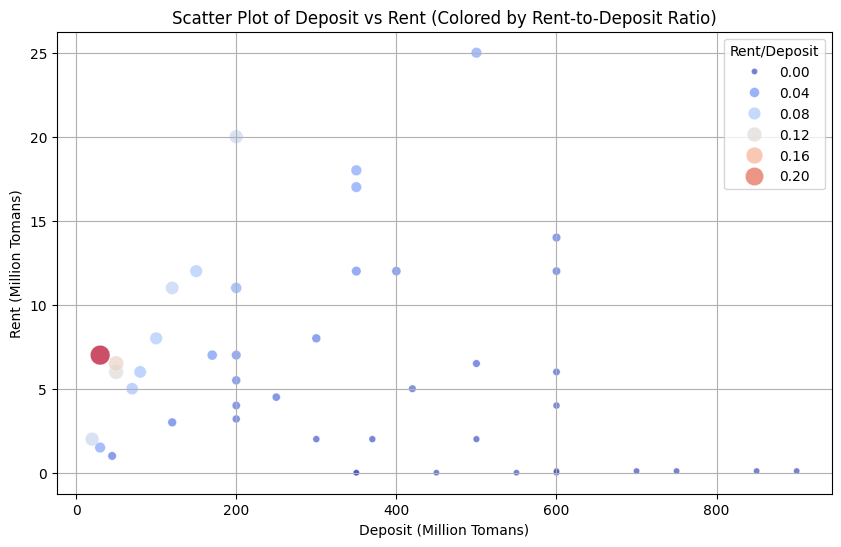

In [16]:
# --- چک کنیم rent_to_deposit_ratio وجود داره؟ ---
if 'rent_to_deposit_ratio' not in filtered_df.columns:
    print("ستون rent_to_deposit_ratio وجود نداره، در حال ساخت...")
    filtered_df['rent_to_deposit_ratio'] = np.where(
        filtered_df['deposit_num'] == 0,
        0,
        filtered_df['rent_num'] / filtered_df['deposit_num']
    )

# --- حالا نمودار رو بکش ---
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=filtered_df,
    x='deposit_million',
    y='rent_million',
    hue='rent_to_deposit_ratio',
    palette='coolwarm',
    alpha=0.7,
    size='rent_to_deposit_ratio',
    sizes=(20, 200)
)
plt.title("Scatter Plot of Deposit vs Rent (Colored by Rent-to-Deposit Ratio)")
plt.xlabel("Deposit (Million Tomans)")
plt.ylabel("Rent (Million Tomans)")
plt.grid(True)
plt.legend(title="Rent/Deposit")
plt.show()

### Modeling

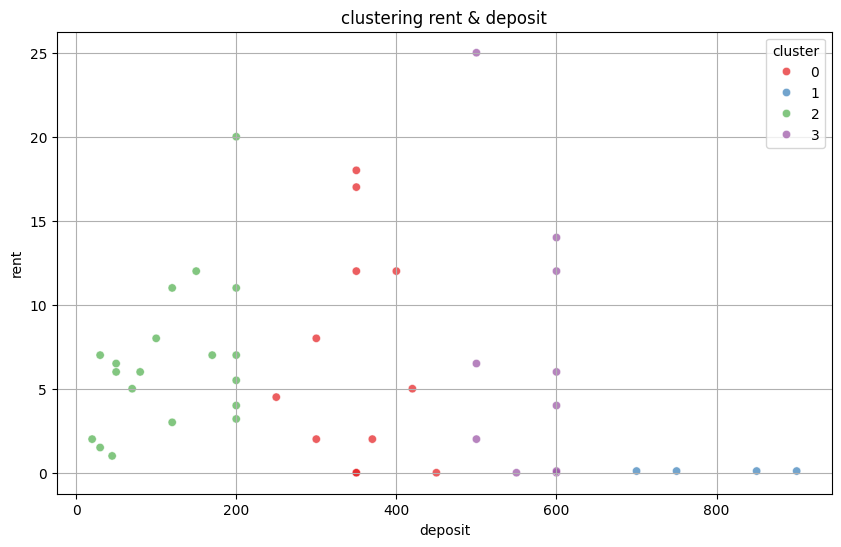

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# انتخاب ویژگی‌ها
X = filtered_df[['deposit_num', 'rent_num']]

# خوشه‌بندی با KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
filtered_df['cluster'] = kmeans.fit_predict(X)

# نمایش نتایج
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='deposit_million', y='rent_million', hue='cluster', palette='Set1', alpha=0.7)
plt.title("clustering rent & deposit")
plt.xlabel( "deposit")
plt.ylabel("rent")
plt.grid(True)
plt.show()

In [18]:
# --- سلول ۱: خواندن، تمیز کردن و فیلتر ---
import pandas as pd
import numpy as np
import re

# --- ۱. خواندن داده ---
df = pd.read_csv("divar_listings.csv")


# --- ۲. تابع تمیز کردن و استخراج عدد ---
def extract_number(text):
    text = text.translate(str.maketrans("۰۱۲۳۴۵۶۷۸۹", "0123456789"))
    cleaned_text = re.sub(r"[^0-9]", "", text)
    return int(cleaned_text) if cleaned_text else 0


# --- ۳. ساخت ستون‌های عددی ---
df['deposit_num'] = df['deposit'].apply(extract_number)
df['rent_num'] = df['rent'].apply(extract_number)

df['deposit_million'] = df['deposit_num'] / 1e6
df['rent_million'] = df['rent_num'] / 1e6


# --- ۴. فیلتر کردن داده ---
filtered_df = df[(df['deposit_num'] < 1_000_000_000) & (df['rent_num'] < 30_000_000)].copy()


# --- ۵. ساخت ویژگی rent_to_deposit_ratio ---
filtered_df['rent_to_deposit_ratio'] = np.where(
    filtered_df['deposit_num'] == 0,
    0,
    filtered_df['rent_num'] / filtered_df['deposit_num']
)


# --- چک کردن inf و NaN در X ---
X = filtered_df[['deposit_num', 'rent_to_deposit_ratio']]
y = filtered_df['rent_num']

X = X.replace([np.inf, -np.inf], np.nan).fillna(0).astype(np.float64)
y = y[X.index]

print("تعداد ردیف در X:", len(X))
print("تعداد ردیف در y:", len(y))

# --- ذخیره X و y برای استفاده در سلول‌های بعدی ---
import pickle
pickle.dump((X, y), open("X_y_data.pkl", "wb"))

print("داده آماده شد و ذخیره شد!")

تعداد ردیف در X: 45
تعداد ردیف در y: 45
داده آماده شد و ذخیره شد!


Linear Regression

RMSE (Linear Regression): 4.33 Million Tomans


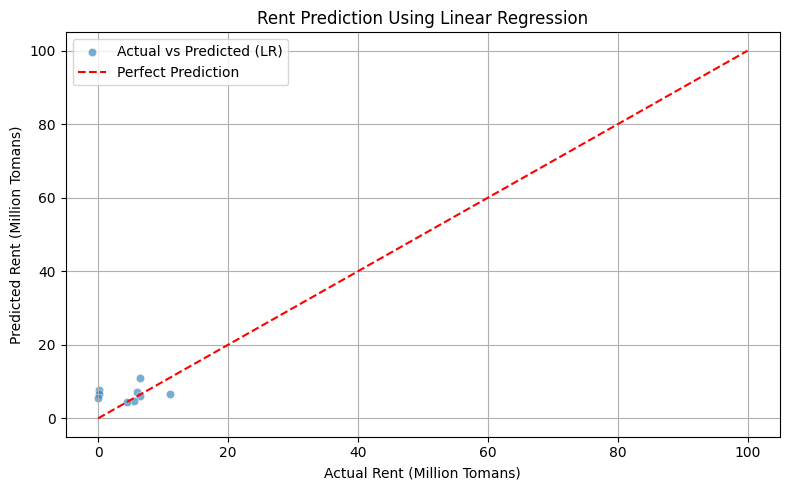

In [19]:
# --- سلول ۲: مدل Linear Regression ---


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



# --- بارگذاری X و y ---
X, y = pickle.load(open("X_y_data.pkl", "rb"))


# --- تقسیم داده ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# --- مدل Linear Regression ---
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# --- محاسبه RMSE ---
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE (Linear Regression): {rmse / 1e6:.2f} Million Tomans")


# --- نمودار Actual vs Predicted ---
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test / 1e6, y=y_pred / 1e6, alpha=0.6, label="Actual vs Predicted (LR)")
plt.plot([0, 100], [0, 100], color='red', linestyle="--", label="Perfect Prediction")
plt.xlabel("Actual Rent (Million Tomans)")
plt.ylabel("Predicted Rent (Million Tomans)")
plt.title("Rent Prediction Using Linear Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Random forest

RMSE (Random Forest): 1.16 Million Tomans


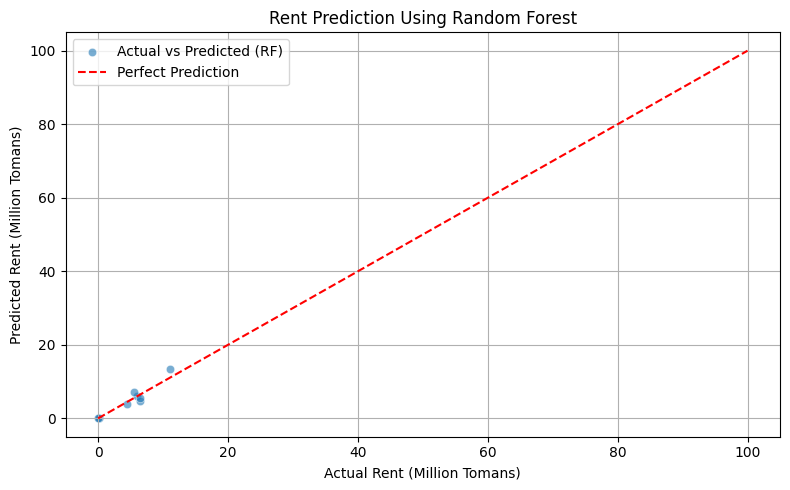

In [20]:
# --- سلول ۳: مدل Random Forest ---


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



# --- بارگذاری X و y ---
X, y = pickle.load(open("X_y_data.pkl", "rb"))


# --- تقسیم داده ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# --- مدل Random Forest ---
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# --- محاسبه RMSE ---
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE (Random Forest): {rmse / 1e6:.2f} Million Tomans")


# --- نمودار مقایسه‌ای ---
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test / 1e6, y=y_pred / 1e6, alpha=0.6, label="Actual vs Predicted (RF)")
plt.plot([0, 100], [0, 100], color='red', linestyle="--", label="Perfect Prediction")
plt.xlabel("Actual Rent (Million Tomans)")
plt.ylabel("Predicted Rent (Million Tomans)")
plt.title("Rent Prediction Using Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

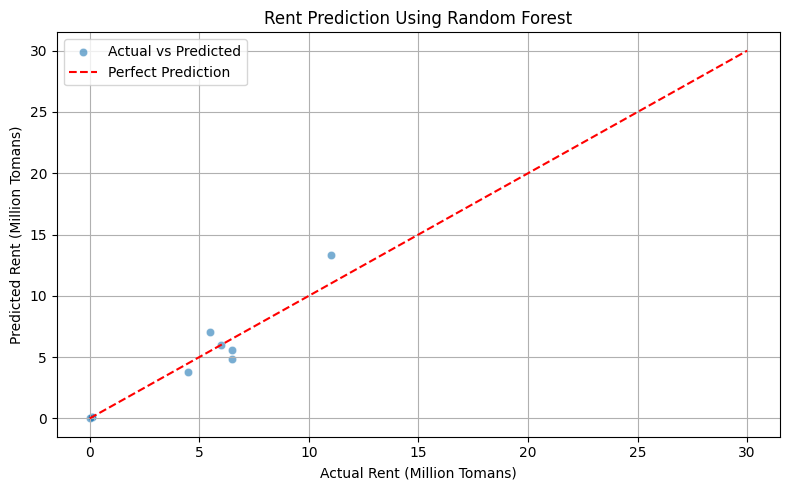

In [21]:

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test / 1e6, y=y_pred / 1e6, alpha=0.6, label="Actual vs Predicted")
plt.plot([0, 30], [0, 30], color='red', linestyle="--", label="Perfect Prediction")
plt.xlabel("Actual Rent (Million Tomans)")
plt.ylabel("Predicted Rent (Million Tomans)")
plt.title("Rent Prediction Using Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

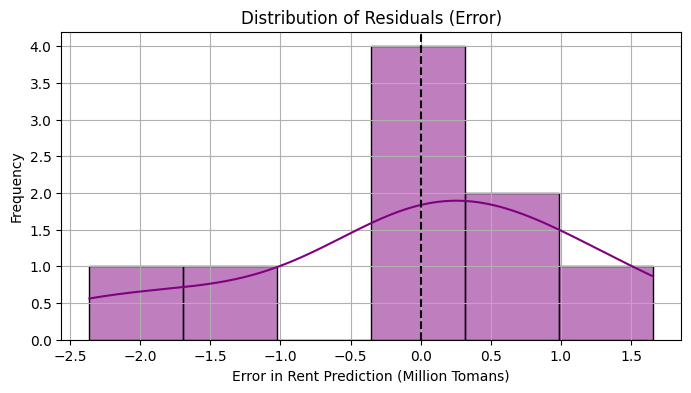

In [22]:
residuals = (y_test - y_pred) / 1e6

plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, color='purple')
plt.axvline(0, color='black', linestyle='--')
plt.title("Distribution of Residuals (Error)")
plt.xlabel("Error in Rent Prediction (Million Tomans)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### XGBoost
### Gradient Boosting
### Hyperparameter Tuning